# Homework 13
## 13-1 
数值研究 d（d=1, 2, 3）维空间中随机行走返回原点的几率$P_d$，讨论它 随步数 N 的变化关系 $P_d(N)$，能否定义相关的指数值？

$$P(x_{2n}=0)= \frac{2n!}{(n!)^22^n}$$
利用Stirling's Approximation:
$$n!\approx\sqrt{2\pi n}\left(\frac{n}{e}\right)^n$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import multiprocessing as mp
import time
import math
%matplotlib inline

N = int(1e6)
T = 1000
num_t = 10
n = N // num_t

In [33]:
# d = 1

def d1(n, lock, probs):
    local_probs = []
    for row in range(n):
        x = 0
        rands = np.random.randint(0, high=2, size=T) * 2 - 1
        prob = []
        for index, r in enumerate(rands):
            x += r 
            prob.append(np.int(x == 0))
        local_probs.append(prob)

    lock.acquire()
    try:
        probs.append(np.mean(local_probs, axis=0))
    finally:
        lock.release()


start = time.time()
ts = []
lock = mp.Lock()
share_probs = mp.Manager().list()
for t in range(num_t):
    t = mp.Process(target=d1, args=(n, lock, share_probs))
    ts.append(t)

for t in ts:
    t.start()

for t in ts:
    t.join()


probs = np.mean(share_probs, axis=0)
print(time.time() - start)

205.92995977401733


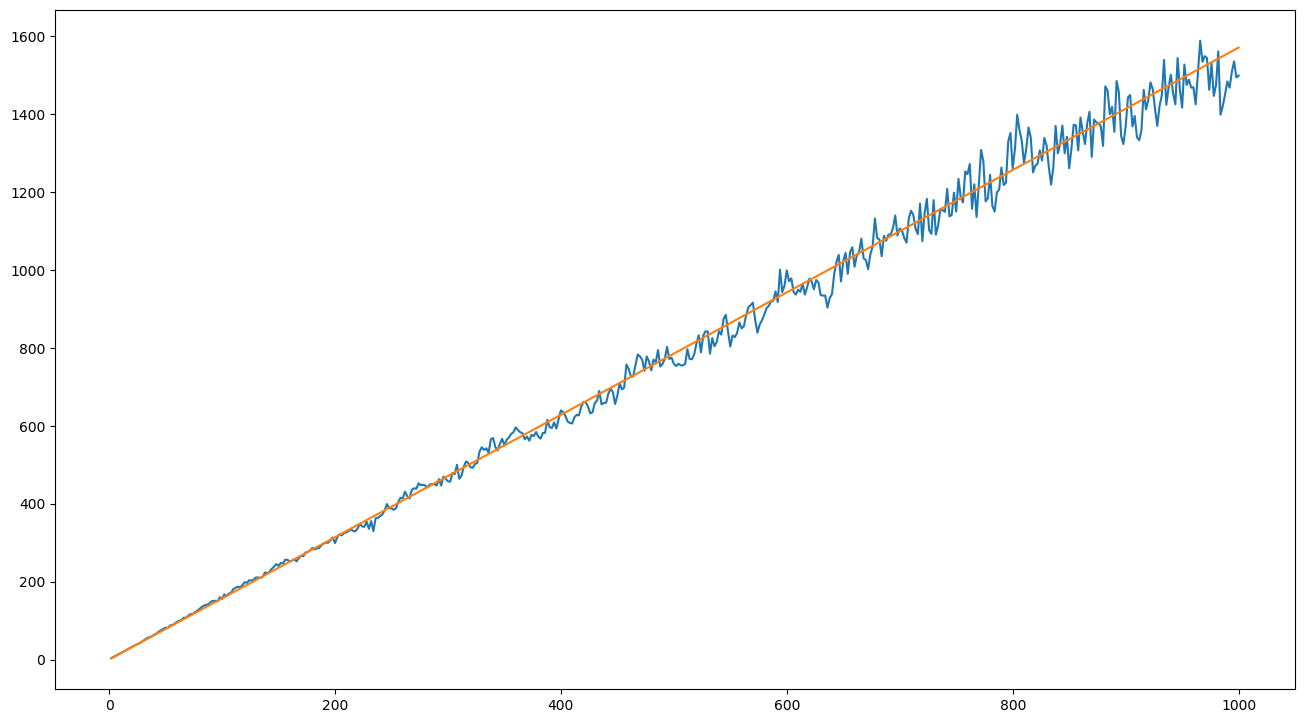

In [43]:
plt.figure(figsize=(16, 9), dpi=100)
x = np.arange(2, 1001, 2)
y = np.pi * x / 2
plt.plot(np.arange(2, 1001, 2), np.power(probs[1::2], -2))
plt.plot(x, y)
plt.show()

In [22]:
# d = 2

def d2(n, lock, probs):
    local_probs = []
    for row in range(n):
        x = 0
        y = 0
        rands_x = np.random.randint(0, high=2, size=T) * 2 - 1
        rands_y = np.random.randint(0, high=2, size=T) * 2 - 1
        prob = []
        for i, j in zip(rands_x, rands_y):
            x += i
            y += j
            prob.append(np.int(x == 0 and y == 0))
        local_probs.append(prob)

    lock.acquire()
    try:
        probs.append(np.mean(local_probs, axis=0))
    finally:
        lock.release()


start = time.time()
ts = []
lock = mp.Lock()
share_probs = mp.Manager().list()
for t in range(num_t):
    t = mp.Process(target=d2, args=(n, lock, share_probs))
    ts.append(t)

for t in ts:
    t.start()

for t in ts:
    t.join()


probs = np.mean(share_probs, axis=0)
print(time.time() - start)

24.12087392807007


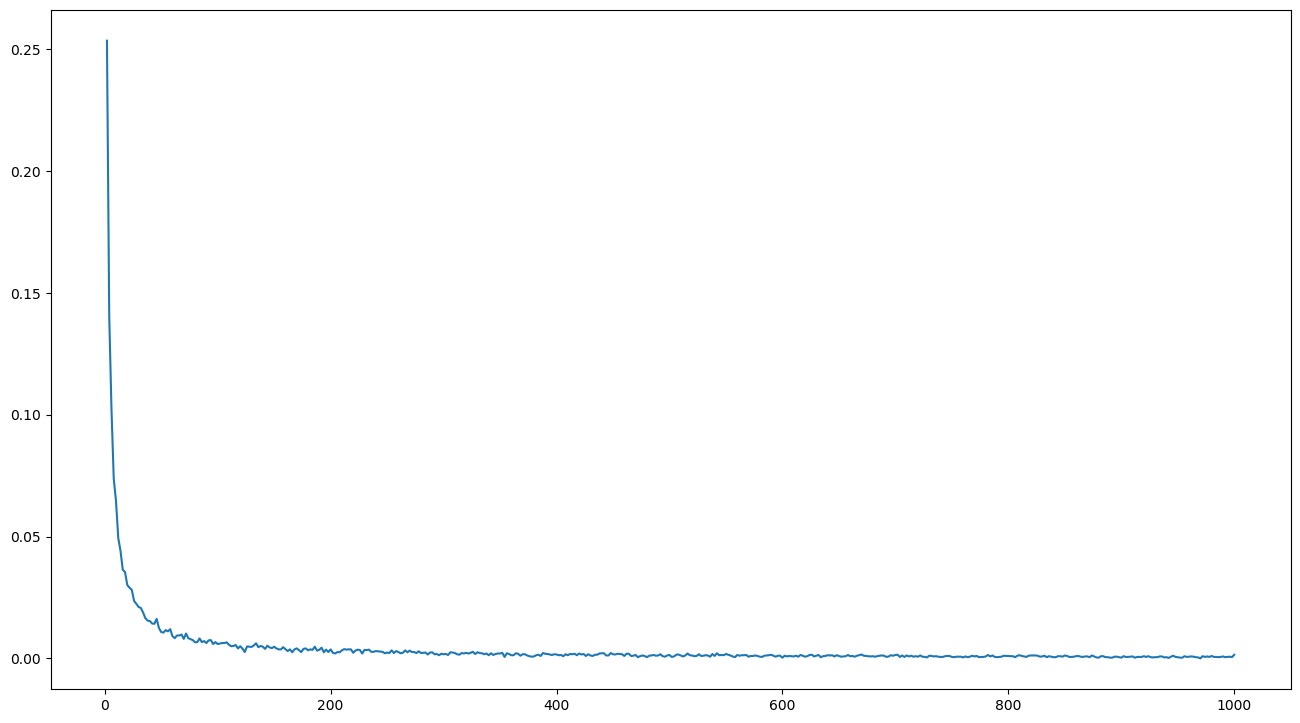

In [26]:
plt.figure(figsize=(16, 9), dpi=100)
plt.plot(np.arange(2, 1001, 2), probs[1::2])
# x = np.arange(2, 1001, 2)
# logx = -np.log(x)
# plt.plot(x, logx)
plt.show()